In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
import random
random.seed(9115)

from tqdm import tqdm, trange

NODES = 5000
TERM = "time"

with open('wordlist.10000') as f:
    words = f.readlines()
words = [w.strip() for w in words if len(w.strip()) >= 4]

In [3]:
nodes = []

for i in trange(NODES):
    parent = random.randrange(len(nodes)) if nodes else None
    nodes.append((parent, random.choice(words)))


100%|██████████| 5000/5000 [00:00<00:00, 259873.36it/s]


In [4]:
G = nx.Graph()
for i, (parent, word) in enumerate(nodes):
    G.add_node(i, word=word)
    if parent is not None:
        G.add_edge(i, parent)

In [5]:
G.number_of_nodes(), G.number_of_edges()

(5000, 4999)

In [6]:
import json
import numpy as np

# layout = nx.kamada_kawai_layout(G)
# with open('layout.json', 'w') as f:
#     json.dump({k: v.tolist() for k, v in layout.items()}, f)
# CPU times: user 13min 40s, sys: 3min 56s, total: 17min 37s
# Wall time: 17min 38s

with open('layout.json') as f:
    layout = json.load(f)
layout = {int(k): np.array(v) for k, v in layout.items()}

In [9]:
# %%time

centrality = np.array([nx.shortest_path_length(G, 0, i) for i in G.nodes])

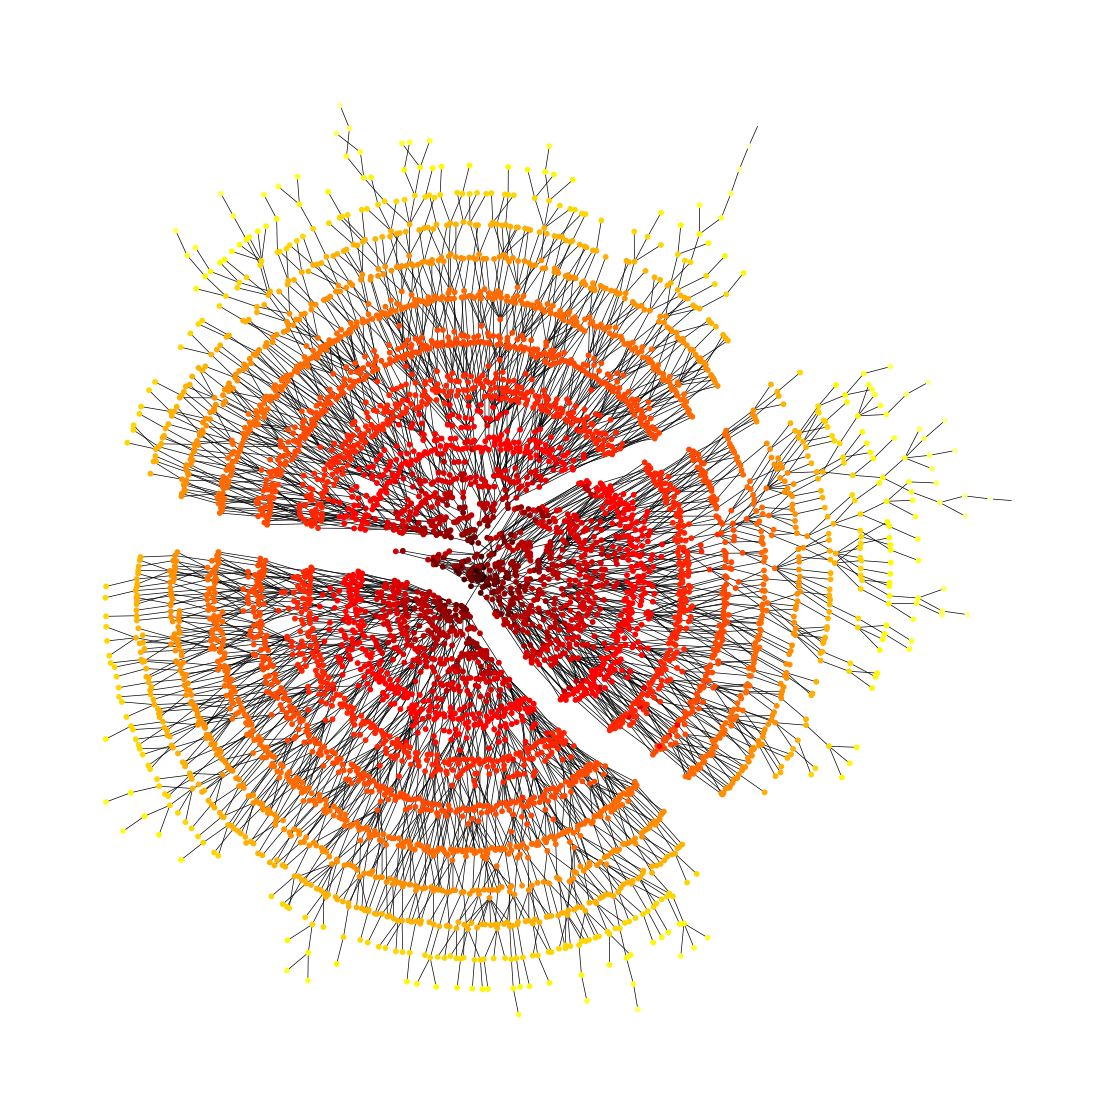

In [12]:
plt.figure(figsize=(11, 11))
nx.draw(G, pos=layout, node_size=10, width=0.5, edge_color="black", cmap=plt.cm.hot, node_color=centrality)